In [0]:
# !pip install --upgrade tensorflow
import tensorflow as tf
print(tf.__version__)

2.0.0


In [0]:
# Load in the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
# normalize/scale to between 0 and 1
x_train, x_test = x_train/255.0, x_test/255.0
print("x_train.shape: ", x_train.shape)

x_train.shape:  (60000, 28, 28)


In [0]:
# build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape = (28,28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation = 'softmax')
])

In [0]:
# compile the model
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [0]:
# train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 113us/sample - loss: 0.2984 - accuracy: 0.9129 - val_loss: 0.1369 - val_accuracy: 0.9588
Epoch 2/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.1415 - accuracy: 0.9585 - val_loss: 0.0997 - val_accuracy: 0.9699
Epoch 3/10
60000/60000 [==============================] - 6s 103us/sample - loss: 0.1078 - accuracy: 0.9678 - val_loss: 0.0858 - val_accuracy: 0.9745
Epoch 4/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.0879 - accuracy: 0.9736 - val_loss: 0.0800 - val_accuracy: 0.9750
Epoch 5/10
60000/60000 [==============================] - 6s 102us/sample - loss: 0.0745 - accuracy: 0.9765 - val_loss: 0.0737 - val_accuracy: 0.9758
Epoch 6/10
60000/60000 [==============================] - 6s 103us/sample - loss: 0.0668 - accuracy: 0.9790 - val_loss: 0.0753 - val_accuracy: 0.9775
Epoch 7/10
60000/60000 [==========================

In [0]:
# plot the loss per iteration
import matplotlib.pyplot as plt

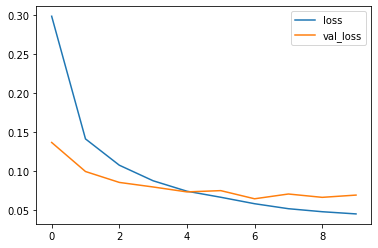

In [0]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

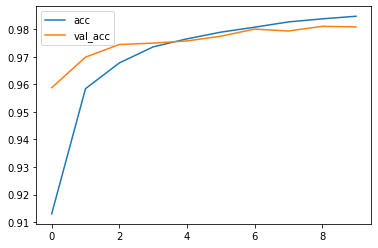

In [0]:
# plot the accuracy per iteration
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()

In [0]:
# evaluate the model
print(model.evaluate(x_test, y_test))

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [0]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, normalize = False,
                          title = 'Confusion Matrix',
                          cmap = plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalize=True'
  """
  if normalize:
    cm = cm.astype('float')/cm.sum(axis = 1)[:, np.newaxis]
    print("Normalized Confusion Matrix")

  else:
    print("Confusion matrix, without normalization")

  # print(cm)
  plt.imshow(cm, interpolation='nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max()/2.
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, format(cm[i,j], fmt),
             horizontalalignment='center',
             color = 'white' if cm[i,j] > thresh else 'black')
    
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()

Confusion matrix, without normalization


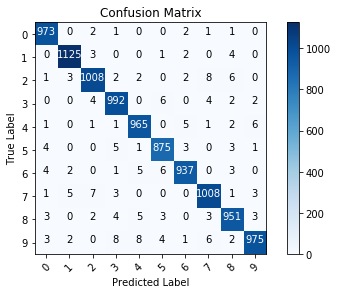

In [0]:
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

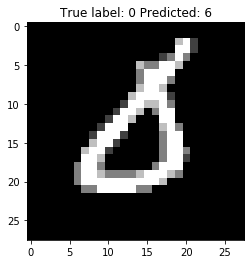

In [0]:
# show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap = 'gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));